In [191]:
from itertools import product
import matplotlib.pyplot as plt
import random
from IPython.display import HTML

In [200]:
def get_neighbors(x, y):
    return {(x+i, y+j) for i, j in product([-1,0,1], [-1, 0, 1]) if (i, j) != (0, 0)}
        

class Board:
    def __init__(self, cells={}):
        self.cells = cells # {(x1, y1), ..., (xn, yn)} set of living cells at the start of the iterations

    def advance(self):
        new_cells = set()
        for (x, y) in self.cells:
            if len(get_neighbors(x, y).intersection(self.cells)) in (2, 3):
                new_cells.add((x, y))
            for (a, b) in get_neighbors(x,y):
                if (a, b) not in self.cells:
                    if len(get_neighbors(a, b).intersection(self.cells)) == 3:
                        new_cells.add((a, b))
        #print(new_cells)
        self.cells = new_cells


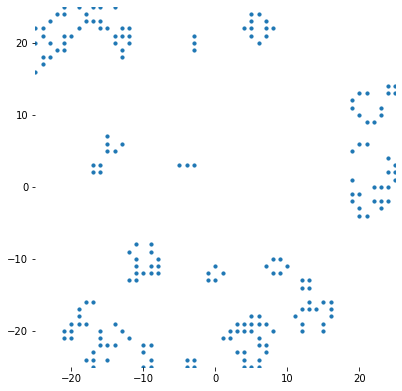

In [202]:
from matplotlib.animation import FuncAnimation

fig = plt.figure(figsize=(5,5))
ax = fig.add_axes([0, 0, 1, 1], frameon=False)
ax.set_xlim(-25, 25)
ax.set_ylim(-25, 25)
N = 1200
x = [random.randint(-20, 20) for i in range(N)]
y = [random.randint(-20, 20) for i in range(N)]

scat = ax.scatter(x, y, s=10)

test = Board(set([(x[i], y[i]) for i in range(N)]))

def update(i, test, scat):
    test.advance()
    x = [x for x, y in test.cells]
    y = [y for x, y in test.cells]
    scat.set_offsets([(x[i], y[i]) for i in range(len(x))])

    return scat

animation = FuncAnimation(fig, update, frames=range(100), interval=50, fargs=(test, scat))

HTML(animation.to_jshtml())

    